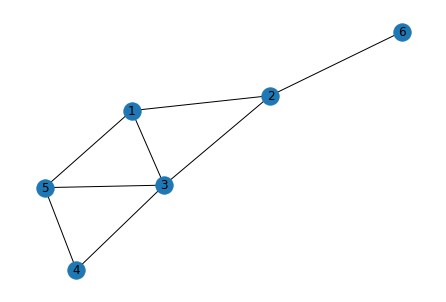

In [152]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)
G.add_edge(3, 5)
G.add_edge(2, 6)

nx.draw(G, with_labels=True)

In [84]:
G.degree()

DiDegreeView({1: 3, 2: 3, 3: 4, 5: 3, 4: 2, 6: 1})

In [86]:
nx.degree_centrality(G)

{1: 0.6000000000000001,
 2: 0.6000000000000001,
 3: 0.8,
 5: 0.6000000000000001,
 4: 0.4,
 6: 0.2}

True

In [108]:
import pandas as pd
n = G.number_of_nodes()

#pd.DataFrame.from_dict(dict(G.degree()), columns=['degree'], orient='index')

degrees = [dict(G.degree())]
if isinstance(G, nx.DiGraph):
    degrees.append(dict(G.in_degree()))
    degrees.append(dict(G.out_degree()))
    
data = {}
for k in degrees[0].keys():
    data[k] = tuple(d[k] for d in degrees)


df['deg_centr_max_poss_degree'] = df['degree']/(n-1)

max_degree = df['degree'].max()
df['deg_centr_max_degree'] = df['degree']/max_degree

df

,degree,deg_centr_max_poss_degree,deg_centr_max_degree
1,3,0.6,0.75
2,3,0.6,0.75
3,4,0.8,1.00
5,3,0.6,0.75
4,2,0.4,0.50
6,1,0.2,0.25


In [153]:
class DegreeCentrality:
    
    def __init__(self):
        pass
    
    def load(self, G):
        self.n = G.number_of_nodes()
        self.G = G
        
        #load graph
        if isinstance(G, nx.DiGraph):
            self.load_digraph(G)
        else:
            self.load_graph(G)
            
        #compute degree stats
        self.df['deg_centr_max_poss_degree'] = self.df['degree']/(self.n-1)
        
        max_degree = df['degree'].max()
        self.df['deg_centr_max_degree'] = self.df['degree']/max_degree
        
        deg_sum = df['degree'].max()
        self.df['deg_centr_max_degree'] = self.df['degree']/max_degree
        
        self.df['deg_centr_degree_sum'] = self.df['degree']/G.number_of_edges()
        
        
        if self.digraph:
            self.df['deg_centr_max_degree_out'] = self.df['out_degree']/max_degree
            self.df['deg_centr_max_degree_in'] = self.df['in_degree']/max_degree
            
            self.df['deg_centr_max_poss_degree_out'] = self.df['out_degree']/(self.n-1)
            self.df['deg_centr_max_poss_degree_in'] = self.df['in_degree']/(self.n-1)

            self.df['deg_centr_degree_sum_out'] = self.df['out_degree']/G.number_of_edges()
            self.df['deg_centr_degree_sum_in'] = self.df['in_degree']/G.number_of_edges()
            
            
        return self.df
       
    
    def load_digraph(self, G):
        self.digraph = True
        degrees = [dict(G.degree()), dict(G.in_degree()), dict(G.out_degree())]
        data = {}
        for k in degrees[0].keys():
            data[k] = tuple(d[k] for d in degrees)
        
        self.df = pd.DataFrame.from_dict(data, columns=["degree", "in_degree", "out_degree"], orient='index')
        
            
    def load_graph(self, G):
        self.digraph = False
        self.df = pd.DataFrame.from_dict(dict(G.degree()), columns=["degree"], orient='index')
        
        
    def graph_degree_centrality(self):
        return nx.to_numpy_matrix(G).dot([1]*self.n)
        
            
    

dc = DegreeCentrality()
dc.load(G)
dc.graph_degree_centrality()

matrix([[3., 3., 4., 3., 2., 1.]])